<h2 style="color: pink">❓The main question:</h2>
How does the IMDb rating compare to the Metacritic score in terms of predicting a movie's success, and which of these metrics is more reliable for forecasting future movie performance?

Purpose: Comparing IMDb ratings with Metacritic scores and their correlation with box office gross, as well as other success factors, helps determine which platform’s critics' or user feedback is a better predictor of commercial success.

Impact: This can help inform marketing and production strategies, such as where to focus efforts in terms of gathering reviews, as well as determining whether to prioritize user reviews or critic reviews for shaping audience expectations.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from PATHS import HOME, DATASET

HOME:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset
DATASET:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset\data\imdb_top_1000.csv


In [2]:
print('HOME: ', HOME)
print('DATASET: ', DATASET)

HOME:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset
DATASET:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset\data\imdb_top_1000.csv


In [3]:
df = pd.read_csv(DATASET)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df.keys()

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
df = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]

In [7]:
df.isnull().sum()

IMDB_Rating      0
Meta_score     157
No_of_Votes      0
Gross          169
dtype: int64

In [8]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Meta_score']

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_6172\2278456400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())


0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64

In [9]:
df = df.dropna(subset=['Gross'])
df

,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,9.3,80.0,2343110,"28,341,469"
1,9.2,100.0,1620367,"134,966,411"
2,9.0,84.0,2303232,"534,858,444"
3,9.0,90.0,1129952,"57,300,000"
4,9.0,96.0,689845,"4,360,000"
...,...,...,...,...
990,7.6,77.0,30144,"696,690"
991,7.6,50.0,45338,"1,378,435"
992,7.6,65.0,166409,"141,843,612"
994,7.6,96.0,40351,"13,780,024"


In [10]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)
df

,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,9.3,80.0,2343110,28341469
1,9.2,100.0,1620367,134966411
2,9.0,84.0,2303232,534858444
3,9.0,90.0,1129952,57300000
4,9.0,96.0,689845,4360000
...,...,...,...,...
990,7.6,77.0,30144,696690
991,7.6,50.0,45338,1378435
992,7.6,65.0,166409,141843612
994,7.6,96.0,40351,13780024


In [11]:
df.dtypes

IMDB_Rating    float64
Meta_score     float64
No_of_Votes      int64
Gross            int64
dtype: object

             IMDB_Rating  Meta_score  No_of_Votes     Gross
IMDB_Rating     1.000000    0.275781     0.551261  0.095923
Meta_score      0.275781    1.000000     0.006954 -0.032455
No_of_Votes     0.551261    0.006954     1.000000  0.574393
Gross           0.095923   -0.032455     0.574393  1.000000


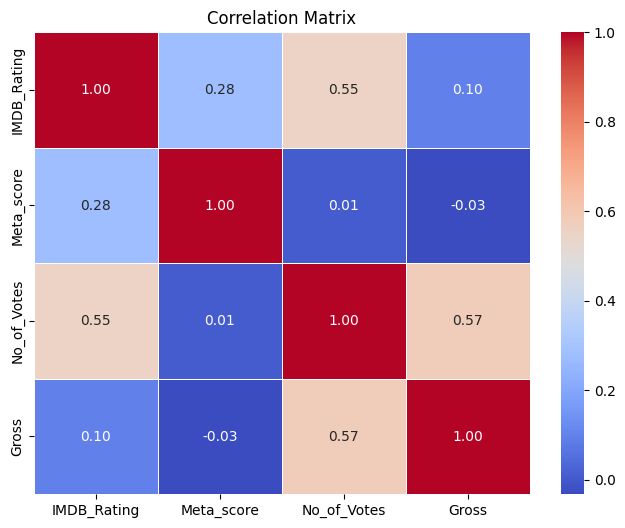

In [12]:
corr_matrix = df.corr()

print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


**Nhận xét**
- IMDB_Rating và No_of_Votes có hệ số tương quan là 0.551261, điều này có nghĩa là có mối quan hệ tích cực yếu giữa số lượng phiếu bầu và điểm xếp hạng IMDb của phim. Nói cách khác, phim có điểm IMDb cao có xu hướng có số lượng phiếu bầu cao hơn.

- No_of_Votes và Gross có hệ số tương quan là 0.574393, cho thấy rằng phim có nhiều phiếu bầu trên IMDb có thể có doanh thu cao hơn ở phòng vé. Đây là một mối quan hệ tích cực vừa phải, vì phim được quan tâm nhiều và có số lượng người xem cao hơn, có thể dẫn đến doanh thu cao hơn.

- IMDB_Rating và Gross có hệ số tương quan là 0.095923, rất thấp và gần như bằng 0, điều này cho thấy mối quan hệ giữa xếp hạng IMDb và doanh thu phòng vé là yếu và không rõ ràng.

- Mặc dù IMDB_Rating và Gross có một mối quan hệ yếu, nhưng giữa No_of_Votes và Gross lại có mối quan hệ tích cực mạnh hơn. Điều này có thể chỉ ra rằng số lượng phiếu bầu có thể là yếu tố trung gian (intermediate factor) giữa xếp hạng IMDb và doanh thu phòng vé. Tức là, số lượng phiếu bầu (No_of_Votes) có ảnh hưởng đến doanh thu phòng vé nhiều hơn điểm số IMDb.

- IMDb Rating chủ yếu phản ánh sự hài lòng của người dùng, nhưng không phải tất cả các phim có số lượng người dùng cao đều thành công về mặt doanh thu. Ví dụ, một số phim có thể nhận được nhiều phiếu bầu từ những người yêu thích thể loại phim cụ thể, nhưng doanh thu phòng vé có thể không cao vì lý do khác (chất lượng sản xuất, sự cạnh tranh với các phim khác, chiến lược marketing kém, v.v.).
Doanh thu phòng vé bị ảnh hưởng bởi rất nhiều yếu tố ngoài IMDB Rating, chẳng hạn như quảng cáo, sự phổ biến của dàn diễn viên, ngày ra mắt phim, và các yếu tố thị trường khác. Vì vậy, chỉ số IMDb rating có thể không phải là yếu tố quyết định duy nhất cho doanh thu phòng vé.
Điểm số Metacritic không phải là yếu tố quan trọng trong trường hợp này:
Mặc dù Meta_score có mối tương quan yếu với IMDB_Rating (0.275781) và gần như không có mối quan hệ với Gross, nhưng điều này cho thấy rằng điểm số của các nhà phê bình không ảnh hưởng trực tiếp đến doanh thu phòng vé như các yếu tố khác (chẳng hạn như người xem, số lượng phiếu bầu).

- IMDB_Rating được đánh giá bởi khán giả đại chúng, trong khi đó No_of_Votes cũng phản ánh sự tham gia của người dùng. Mặc dù số lượng người bỏ phiếu có thể tác động đến doanh thu, nhưng không phải lúc nào điểm IMDb cao cũng liên quan đến doanh thu cao. Một bộ phim có thể nhận được điểm thấp trên IMDb nhưng vẫn thành công ở phòng vé nếu nó có quảng cáo mạnh mẽ hoặc nổi bật với đối tượng khán giả rộng lớn.

In [13]:
X = df.drop(columns=['Gross', 'Meta_score'])
y = df['Gross']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model with R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.43636306496107713
Mean Squared Error: 9133689890783592.0


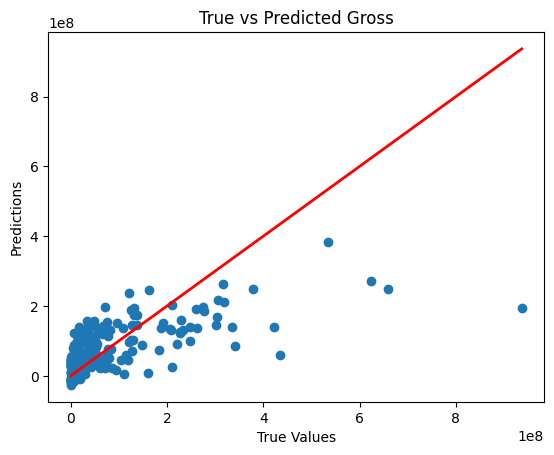

In [18]:
# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Gross')
plt.show()


In [19]:
# Khởi tạo mô hình Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán giá trị doanh thu phòng vé
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình với R² và MSE
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')

R-squared (Random Forest): 0.4352156658941332
Mean Squared Error (Random Forest): 9152283397714994.0


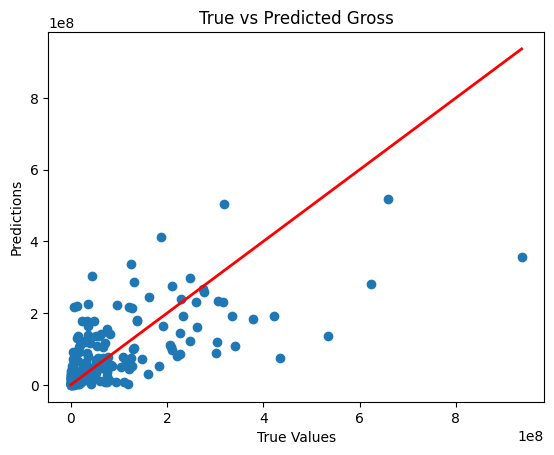

In [20]:
# Plot the true vs predicted values
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Gross')
plt.show()


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo mô hình Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
gb_model.fit(X_train, y_train)

# Dự đoán giá trị doanh thu phòng vé
y_pred_gb = gb_model.predict(X_test)

# Đánh giá mô hình với R² và MSE
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f'R-squared (Gradient Boosting): {r2_gb}')
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')


R-squared (Gradient Boosting): 0.46273446995203327
Mean Squared Error (Gradient Boosting): 8706343455165382.0


In [22]:
from sklearn.svm import SVR

# Khởi tạo mô hình Support Vector Regressor
svr_model = SVR(kernel='rbf')

# Huấn luyện mô hình với dữ liệu huấn luyện
svr_model.fit(X_train, y_train)

# Dự đoán giá trị doanh thu phòng vé
y_pred_svr = svr_model.predict(X_test)

# Đánh giá mô hình với R² và MSE
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Squared Error (SVR): {mse_svr}')


R-squared (SVR): -0.1916429805218991
Mean Squared Error (SVR): 1.931047588970457e+16
